# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [408]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [409]:
%pip install --upgrade plotly

     |████████████████████████████████| 27.7 MB 60.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


### Import Statements

In [494]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

In [495]:
%matplotlib inline

### Notebook Presentation

In [411]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [412]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have? 4324 row; 9 columns
* What are the column names? (['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')
* Are there any NaN values or duplicates?

In [413]:
df_data.shape

(4324, 9)

In [414]:
df_data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [415]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [416]:
df_data[df_data.isna().values]

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
7,7,7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",Long March 5 | Tianwen-1,StatusActive,NaN,Success
13,13,13,IAI,"Pad 1, Palmachim Airbase, Israel","Mon Jul 06, 2020 01:00 UTC",Shavit-2 | Ofek-16,StatusActive,NaN,Success
28,28,28,VKS RF,"Site 43/4, Plesetsk Cosmodrome, Russia","Fri May 22, 2020 07:31 UTC",Soyuz 2.1b/Fregat-M | Cosmos 2546,StatusActive,NaN,Success
31,31,31,ExPace,"Site 95, Jiuquan Satellite Launch Center, China","Tue May 12, 2020 01:16 UTC",Kuaizhou 1A | Xingyun-2 01 (Wuhan) & 02,StatusActive,NaN,Success
...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Wed Feb 05, 1958 07:33 UTC",Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success


Convert raw data date to datetime

In [417]:
df_data['Date'] = pd.to_datetime(df_data.Date, utc=True, errors = 'coerce')


In [418]:
df_data['Date'] = pd.DatetimeIndex(df_data['Date'])

Most of the missing values are in the for the Price. Moving forward, the interpretation of data are narrowed down to the data with mission Price publicly declared.

---



In [419]:
df_data.duplicated().values.any()

False

In [420]:
df_data.Location.dtype

dtype('O')

In [421]:
df_data['Country'] = df_data.Location.apply(lambda x: x.split(',')[-1]).str.strip() #location item is not a string bt an object. str.split will not work

In [422]:
df_data

,Unnamed: 0,Unnamed: 0.1,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
...,...,...,...,...,...,...,...,...,...,...
4319,4319,4319,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05 07:33:00+00:00,Vanguard | Vanguard TV3BU,StatusRetired,NaN,Failure,USA
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01 03:48:00+00:00,Juno I | Explorer 1,StatusRetired,NaN,Success,USA
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06 16:44:00+00:00,Vanguard | Vanguard TV3,StatusRetired,NaN,Failure,USA
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan


In [423]:
df_clean = df_data.dropna()

In [424]:
df_clean = df_clean.drop(df_clean.columns[[0,1]], axis=1)

In [425]:
df_data = df_data.drop(df_data.columns[[0,1]], axis=1)

In [426]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [427]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    964 non-null    object             
 1   Location        964 non-null    object             
 2   Date            964 non-null    datetime64[ns, UTC]
 3   Detail          964 non-null    object             
 4   Rocket_Status   964 non-null    object             
 5   Price           964 non-null    object             
 6   Mission_Status  964 non-null    object             
 7   Country         964 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 67.8+ KB


Change values to appropriate data types. Datetime as data, price as float.

In [428]:
#convert data to UTC first so it can be converted to DatetimeIndex. DatetimeIndex can be used for time series
df_clean['Date'] = pd.to_datetime(df_clean.Date, utc=True)

In [429]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [430]:
df_clean.Date = pd.DatetimeIndex(df_clean.Date)

In [431]:
df_clean.Country.value_counts()

USA                               487
China                             158
France                             95
India                              67
Russia                             54
Kazakhstan                         46
Japan                              40
New Zealand                        13
Gran Canaria                        2
Yellow Sea                          1
Pacific Missile Range Facility      1
Name: Country, dtype: int64

In [432]:
df_clean['Price'] = df_clean['Price'].str.replace(',', '').astype(float)


In [433]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 0 to 4020
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    964 non-null    object             
 1   Location        964 non-null    object             
 2   Date            964 non-null    datetime64[ns, UTC]
 3   Detail          964 non-null    object             
 4   Rocket_Status   964 non-null    object             
 5   Price           964 non-null    float64            
 6   Mission_Status  964 non-null    object             
 7   Country         964 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(6)
memory usage: 67.8+ KB


## Descriptive Statistics

In [434]:
df_clean.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,"Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...",StatusActive,64.68,Success,China


In [435]:
df_clean.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [436]:
df_clean.Organisation.value_counts()

CASC               158
NASA               149
SpaceX              99
ULA                 98
Arianespace         96
Northrop            83
ISRO                67
MHI                 37
VKS RF              33
US Air Force        26
Roscosmos           23
Kosmotras           22
ILS                 13
Eurockot            13
Rocket Lab          13
Martin Marietta      9
Lockheed             8
Boeing               7
JAXA                 3
RVSN USSR            2
Sandia               1
Virgin Orbit         1
ESA                  1
ExPace               1
EER                  1
Name: Organisation, dtype: int64

In [437]:
min_price = df_clean.loc[df_clean.Price.idxmin(),:]
min_price

Organisation                                        CASC
Location          Xichang Satellite Launch Center, China
Date                           2020-05-29 20:13:00+00:00
Detail                   Long March 11 | XJS-G and XJS-H
Rocket_Status                               StatusActive
Price                                               5.30
Mission_Status                                   Success
Country                                            China
Name: 26, dtype: object

In [438]:
max_price = df_clean.loc[df_clean.Price.idxmax(),:]
max_price

Organisation                                         RVSN USSR
Location          Site 110/37, Baikonur Cosmodrome, Kazakhstan
Date                                 1988-11-15 03:00:00+00:00
Detail                                  Energiya/Buran | Buran
Rocket_Status                                    StatusRetired
Price                                                 5,000.00
Mission_Status                                         Success
Country                                             Kazakhstan
Name: 1916, dtype: object

Out of interest, here are the descriptive stats of the raw data i.e. including the ones that have no Price declared.

In [439]:
df_data.Organisation.value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [440]:
df_data.Country.value_counts()

Russia                            1395
USA                               1344
Kazakhstan                         701
France                             303
China                              268
Japan                              126
India                               76
Pacific Ocean                       36
New Zealand                         13
Iran                                13
Israel                              11
Kenya                                9
Australia                            6
North Korea                          5
New Mexico                           4
South Korea                          3
Barents Sea                          3
Brazil                               3
Gran Canaria                         2
Pacific Missile Range Facility       1
Yellow Sea                           1
Shahrud Missile Test Site            1
Name: Country, dtype: int64

In terms of organisation the mission are under, it can be seen that the USSR have to most space missions (1777) but only 2 were declared with price. Followed by ArianeSpace, a French Company.

However,lookig at the big picture, Russia(1395) and USA's(1344) number of missions are close to each other. Space mission in Kazakhstan(701) are also done uder USSR. 

It can also be seen that USA has a more diverse space program where missions do not come from one organisation. They are also more open to disclosing the price of the mission.

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [441]:
df_data.Organisation.value_counts()

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [442]:
df_data.Rocket_Status.value_counts()

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [443]:
mission_status = df_data.Mission_Status.value_counts()
mission_status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

In [444]:
percent_success = mission_status['Success']/ df_data.shape[0] * 100

In [445]:
print(f' There is a {percent_success:.2f}% success rate!' )

 There is a 89.71% success rate!


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

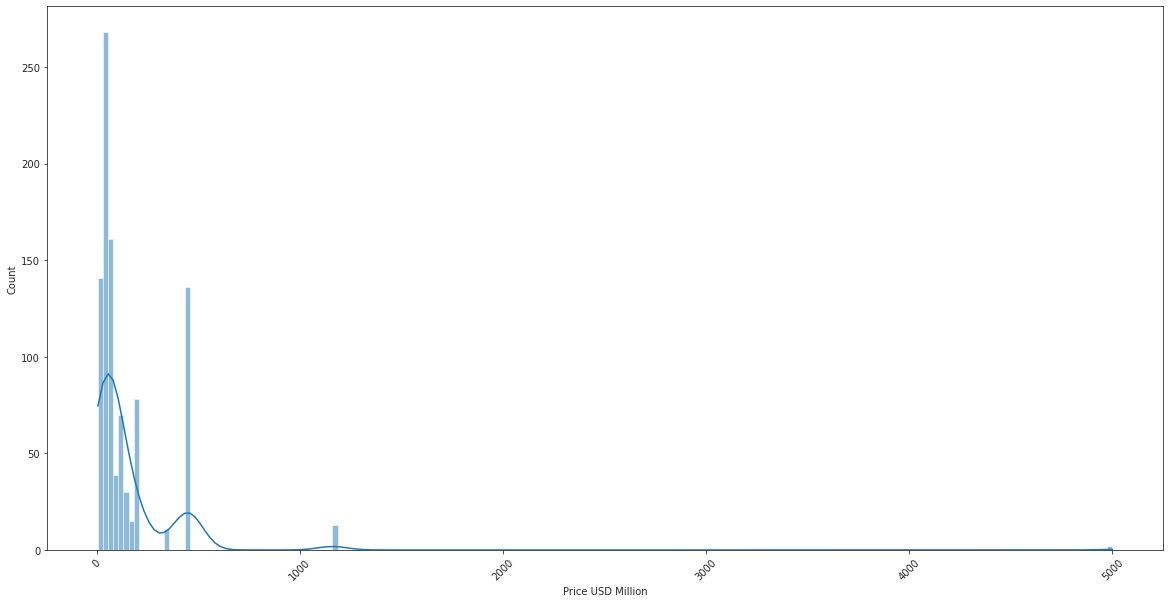

In [446]:
plt.figure(figsize = (20,10))
sns.histplot(data = df_clean, x = 'Price', kde=True)
plt.xticks(rotation = 45)
plt.xlabel('Price USD Million')
plt.show()

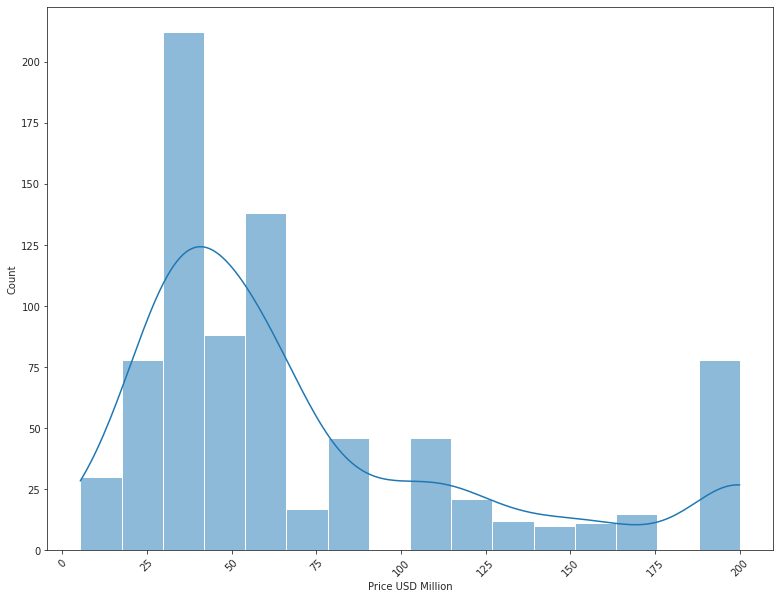

In [447]:
df_no_outlier = df_clean[df_clean.Price <340]
plt.figure(figsize = (13,10))
sns.histplot(data = df_no_outlier, x = 'Price', kde=True)
plt.xticks(rotation = 45)
plt.xlabel('Price USD Million')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [448]:
countries.get('KOR').alpha3

'KOR'

In [449]:
df_data.Country.replace(to_replace = {'Russia': 'Russian Federation', 
                                      'New Mexico': 'USA', 
                                      'Yellow Sea': 'China',
                                      'Shahrud Missile Test Site':'Iran, Islamic Republic of',
                                      'Iran':'Iran, Islamic Republic of',
                                      'Pacific Missile Range Facility':'USA',
                                      'Pacific Ocean':'USA',
                                      'Barents Sea': 'Russian Federation',
                                      'South Korea': 'Korea, Republic of',
                                      'Gran Canaria': 'USA',
                                      'North Korea': "Korea, Democratic People's Republic of"}, inplace=True)

In [450]:
df_data['ISO'] = df_data.Country.apply(lambda x: countries.get(x).alpha3)

In [451]:
df_data.head()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


In [452]:
number_missions = df_data.ISO.value_counts() #get counts and iso per country to use for the chloropleth

In [453]:
import plotly.express as px

fig = px.choropleth(number_missions, locations = number_missions.index, color=number_missions.values,
                    hover_name = number_missions.index,
                    color_continuous_scale="Orrd",
                                       )
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text = 'Number of Launches by Country from 1957 to 2020',)
fig.layout.coloraxis.colorbar.title = 'Number of Launches by Location'
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [454]:
failed_missions = df_data[df_data.Mission_Status != 'Success'].groupby('ISO').count().reset_index()[['ISO', 'Mission_Status']]

In [455]:
failed_missions


,ISO,Mission_Status
0,AUS,3
1,BRA,3
2,CHN,25
3,FRA,18
4,IND,13
5,IRN,9
6,ISR,2
7,JPN,13
8,KAZ,93
9,KOR,2


In [456]:
import plotly.express as px

fig = px.choropleth(failed_missions, locations = 'ISO', color='Mission_Status',
                    hover_name = 'ISO',
                    color_continuous_scale="Hot",
                                       )
# fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, title_text = 'Number of Failed Launches by Country')
fig.layout.coloraxis.colorbar.title = 'Number of Failed Launches'
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [457]:
fig = px.sunburst(
    df_data,
    names='Country',
    parents='Country',
    values='Country',
)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [458]:
total_expenditure_org = df_clean.groupby('Organisation', as_index=False).sum().sort_values('Price', ascending = False)
total_expenditure_org

,Organisation,Price
14,NASA,"76,280.00"
0,Arianespace,"16,345.00"
21,ULA,"14,798.00"
16,RVSN USSR,"10,000.00"
2,CASC,"6,340.26"
20,SpaceX,"5,444.00"
15,Northrop,"3,930.00"
12,MHI,"3,532.50"
8,ISRO,"2,177.00"
22,US Air Force,"1,550.92"


In [459]:
max_total = total_expenditure_org.head(1)
max_total

,Organisation,Price
14,NASA,"76,280.00"


In [460]:
min_total = total_expenditure_org.tail(1)
min_total


,Organisation,Price
24,Virgin Orbit,12.00


(array([-10000.,      0.,  10000.,  20000.,  30000.,  40000.,  50000.,
         60000.,  70000.,  80000.,  90000.]),
 <a list of 11 Text major ticklabel objects>)

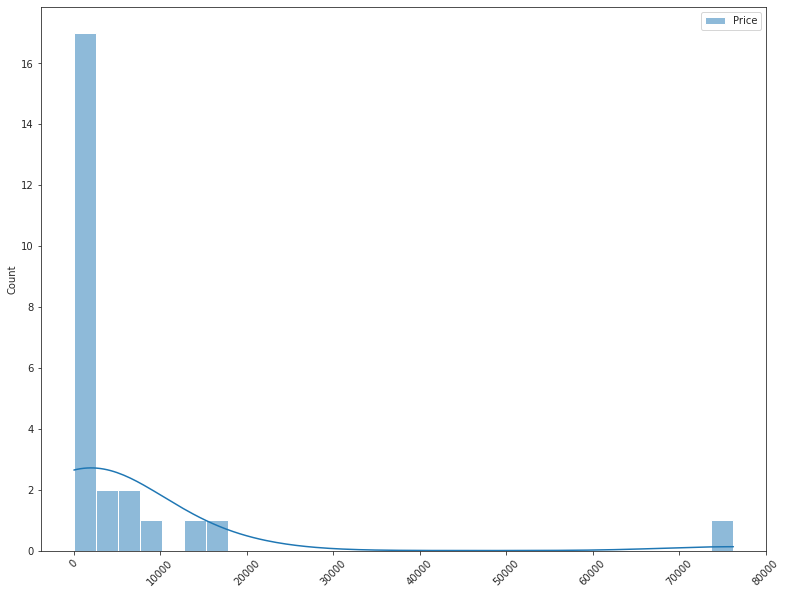

In [461]:
plt.figure(figsize=(13,10))
sns.histplot(total_expenditure_org, kde=True)
plt.xticks(rotation =45)

# Analyse the Amount of Money Spent by Organisation per Launch

In [462]:
per_launch = df_clean.groupby('Organisation', as_index =False).mean()

In [463]:
per_launch.sort_values('Price', ascending = False)

,Organisation,Price
16,RVSN USSR,"5,000.00"
14,NASA,511.95
1,Boeing,177.29
0,Arianespace,170.26
21,ULA,151.00
7,ILS,101.54
12,MHI,95.47
13,Martin Marietta,80.16
22,US Air Force,59.65
9,JAXA,56.00


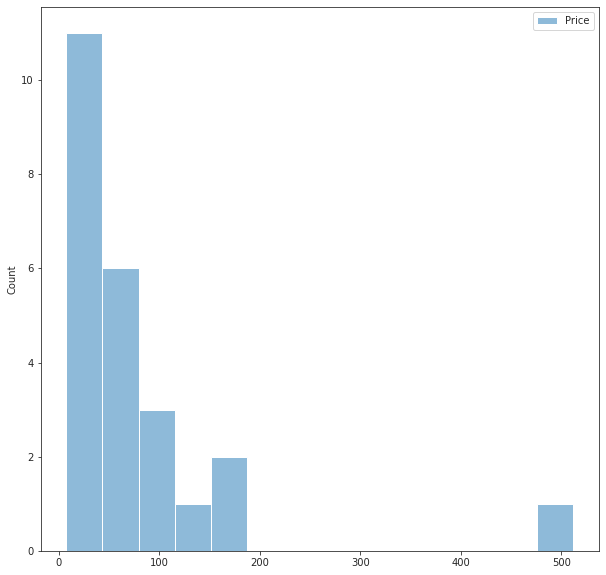

In [464]:
sns.histplot(per_launch[per_launch.Organisation != 'RVSN USSR'])

Excluding the RVSN USSR, we can see that the distribution is skewed to the right. Organisation's have spend less than 200 million USD per launch, and more spending at the lower range. NASA also stands out at an average of 500 million per launch.

In [465]:
fig = px.box(df_clean, x="Organisation", y="Price")
fig.show()

RVSN USSR only declared 2 mission with price and both have exceeded the median price. The data points may not be accurate.

In [466]:
fig = px.box(df_clean[df_clean.Organisation != 'RVSN USSR'], x="Organisation", y="Price")
fig.show()

In [467]:
fig = px.box(df_clean[df_clean.Organisation == 'NASA'], x="Organisation", y="Price")
fig.show()

In [468]:
df_clean[(df_clean.Organisation == 'NASA') & (df_clean.Price > 600)]

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
3149,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1973-05-14 17:30:00+00:00,Saturn V | Skylab 1,StatusRetired,"1,160.00",Success,USA
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-12-19 19:24:00+00:00,Saturn V | Apollo 17,StatusRetired,"1,160.00",Success,USA
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-04-16 17:54:00+00:00,Saturn V | Apollo 16,StatusRetired,"1,160.00",Success,USA
3328,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-07-26 13:34:00+00:00,Saturn V | Apollo 15,StatusRetired,"1,160.00",Success,USA
3384,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1971-01-31 21:03:00+00:00,Saturn V | Apollo 14,StatusRetired,"1,160.00",Success,USA
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11 19:13:00+00:00,Saturn V | Apollo 13,StatusRetired,"1,160.00",Success,USA
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,Saturn V | Apollo 12,StatusRetired,"1,160.00",Success,USA
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,Saturn V | Apollo 11,StatusRetired,"1,160.00",Success,USA
3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18 16:49:00+00:00,Saturn V | Apollo 10,StatusRetired,"1,160.00",Success,USA
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03 16:00:00+00:00,Saturn V | Apollo 9,StatusRetired,"1,160.00",Success,USA


Nasa have spend a fortune in the early stage of space program

# Chart the Number of Launches per Year

In [506]:
launch_per_year = df_data.groupby(df_data.Date.dt.year).count().rename(columns = {'Rocket_Status':'number_of_launches'})[['number_of_launches']].reset_index()
launch_per_year

,Date,number_of_launches
0,1957,3
1,1958,28
2,1959,20
3,1960,39
4,1961,52
...,...,...
59,2016,90
60,2017,92
61,2018,117
62,2019,109


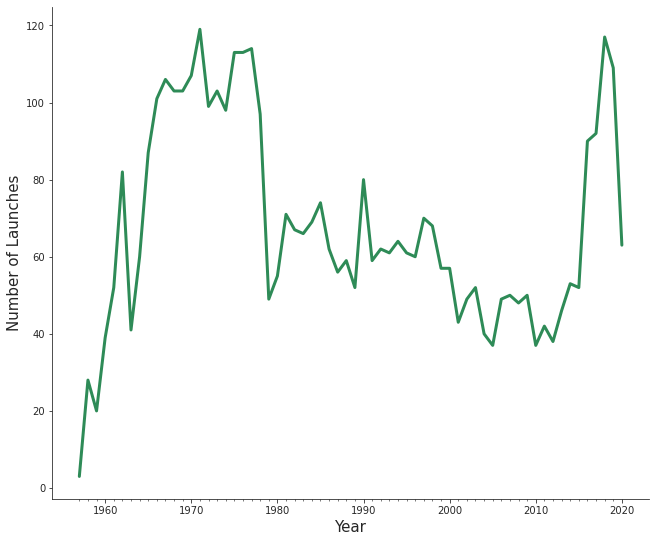

In [507]:
with sns.axes_style('ticks'):
  line = sns.relplot(data =launch_per_year, x='Date', y = 'number_of_launches', kind = 'line', color ='seagreen', linewidth = 3)
  line.fig.set_size_inches(10,8)

  #Set minor ticks
  plt.gca().set_xticks(np.arange(launch_per_year.Date.min(), launch_per_year.Date.max()), minor = True)
  plt.ylabel('Number of Launches', fontsize = 15)
  plt.xlabel('Year', fontsize = 15)
  plt.show()

The Cold War spanned from 1947 to 1991. The race to get to the moon was in 1969. The recent increase in launches at the begunning of 2010 may be the beginning of commercial space race in the hope of starting the Space Tourism.

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [471]:
launch_month_year = df_data.groupby([df_data.Date.dt.year, df_data.Date.dt.month]).count()

launch_month_year

Organisation  Location  Date  Detail  Rocket_Status  Price  \
Date Date                                                               
1957 10               1         1     1       1              1      0   
     11               1         1     1       1              1      0   
     12               1         1     1       1              1      0   
1958 2                2         2     2       2              2      0   
     3                3         3     3       3              3      0   
...                 ...       ...   ...     ...            ...    ...   
2020 4                5         5     5       5              5      4   
     5                9         9     9       9              9      6   
     6                7         7     7       7              7      7   
     7               14        14    14      14             14     12   
     8                3         3     3       3              3      2   

           Mission_Status  Country  ISO  
Date Date                                
1957 10                 1        1    1  
     11                 1        1    1  
     12                 1        1    1  
1958 2                  2        2    2  
     3                  3        3    3  
...                   ...      ...  ...  
2020 4                  5        5    5  
     5                  9        9    9  
     6                  7        7    7  
     7                 14       14   14  
     8                  3        3    3  

[747 rows x 9 columns]

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [472]:
launch_per_month = df_data.groupby(df_data.Date.dt.month).count()

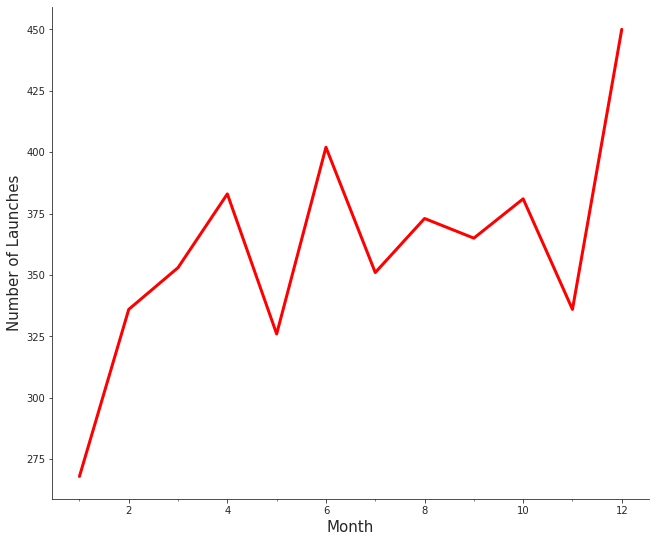

In [473]:

with sns.axes_style('ticks'):
  line = sns.relplot(data =launch_per_month, x=launch_per_month.index, y = 'Rocket_Status', kind = 'line', color ='red', linewidth = 3)
  line.fig.set_size_inches(10,8)

  #Set minor ticks
  plt.gca().set_xticks(np.arange(launch_per_month.index.min(), launch_per_month.index.max()), minor = True)
  plt.ylabel('Number of Launches', fontsize = 15)
  plt.xlabel('Month', fontsize = 15)
  plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [474]:
mean_price_per_date = df_clean.groupby(df_clean.Date.dt.year).mean()


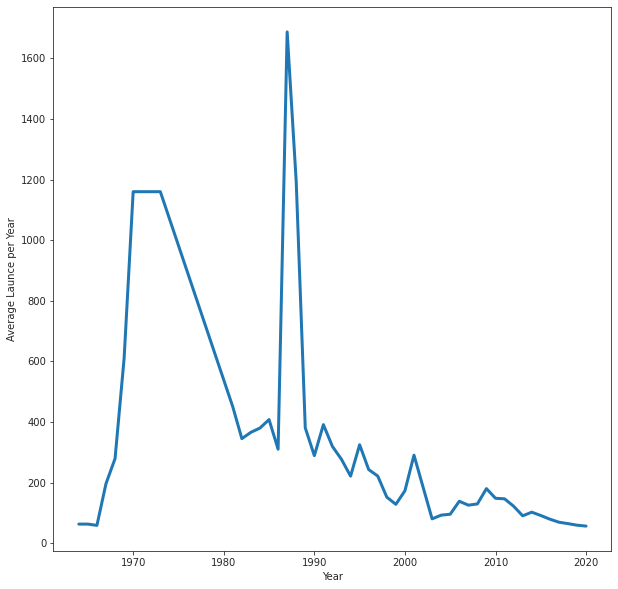

In [475]:
plt.plot(mean_price_per_date.index, mean_price_per_date.Price , linewidth = 3)
plt.xlabel('Year')
plt.ylabel('Average Launce per Year')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [476]:
top_orgs = df_data.Organisation.value_counts()[:10].index.to_list()

In [477]:
df_data[df_data.Organisation == 'RVSN USSR'].sort_values('Date', ascending =False)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,ISO
1299,RVSN USSR,"Site 41/1, Plesetsk Cosmodrome, Russia",1998-08-12 12:53:00+00:00,Molniya-M /Block ML | Molniya-1 n†­133,StatusRetired,NaN,Success,Russian Federation,RUS
1427,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1996-08-29 05:22:00+00:00,"Molniya-M /Block SO-L | Interbol 2, Magion5 & ...",StatusRetired,NaN,Success,Russian Federation,RUS
1497,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1995-08-02 23:59:00+00:00,Molniya-M /Block SO-L | Interbol 1 & Magion 4,StatusRetired,NaN,Success,Russian Federation,RUS
1689,RVSN USSR,"Site 32/1, Plesetsk Cosmodrome, Russia",1992-07-13 17:41:00+00:00,Tsyklon-3 | Cosmos 2197 to 2202,StatusRetired,NaN,Success,Russian Federation,RUS
1691,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1992-07-08 09:53:00+00:00,Molniya-M /Block 2BL | Cosmos 2196,StatusRetired,NaN,Success,Russian Federation,RUS
...,...,...,...,...,...,...,...,...,...
4301,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-09-23 07:40:00+00:00,Vostok | E-1 n†­1 (Luna-1),StatusRetired,NaN,Failure,Kazakhstan,KAZ
4313,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-05-15 07:12:00+00:00,Sputnik 8A91 | Sputnik-3 #2,StatusRetired,NaN,Success,Kazakhstan,KAZ
4315,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1958-04-27 09:01:00+00:00,Sputnik 8A91 | Sputnik-3 #1,StatusRetired,NaN,Failure,Kazakhstan,KAZ
4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03 02:30:00+00:00,Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success,Kazakhstan,KAZ


In [478]:
df_top_orgs_year = df_data[df_data.Organisation.isin(top_orgs)].groupby([df_data.Date.dt.year, 'Organisation']).count()[['Rocket_Status']].reset_index()



In [524]:
org_chart = px.line(df_top_orgs_year,
                  x= 'Date', 
                  y='Rocket_Status',
                  color='Organisation',
                  hover_name='Organisation')
 
org_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Launches',
                      width = 600)
 
org_chart.show()

ValueError: ignored

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [480]:
cold_war = df_data[df_data.Organisation.isin(['RVSN USSR', 'NASA', 'US Air Force'])]
cold_war_count = cold_war.groupby(['Organisation',cold_war.Date.dt.year]).count()[['Rocket_Status']].reset_index()
cold_war_count.rename(columns = {'Rocket_Status':'number_of_launches'}, inplace=True)


In [481]:
coldwar_chart = px.line(cold_war_count,
                  x= 'Date', 
                  y='number_of_launches',
                  color='Organisation',
                  hover_name='Organisation')
 
coldwar_chart.update_layout(xaxis_title='Year',
                      yaxis_title='Number of Lauches')
 
coldwar_chart.show()

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [487]:
pie_df = df_data.Country.value_counts().sort_values(ascending=False)
pie_df

Russian Federation                        1398
USA                                       1387
Kazakhstan                                 701
France                                     303
China                                      269
Japan                                      126
India                                       76
Iran, Islamic Republic of                   14
New Zealand                                 13
Israel                                      11
Kenya                                        9
Australia                                    6
Korea, Democratic People's Republic of       5
Korea, Republic of                           3
Brazil                                       3
Name: Country, dtype: int64

In [490]:

fig = px.pie(values=pie_df.values, names=pie_df.index, color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(height = 900, width = 700)
fig.show()

Russia has has done half of the total space launches, followed by USA, which has done 32% the total space launches. France comes third at 7% followed closely by China at 6%. It is interesting to note that a third of the space launches conducted by Russia was done in Kazakhstan, it's neighbouring country.

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

In [493]:
failure_year = df_data[df_data.Mission_Status != 'Success'].groupby(df_data.Date.dt.year).count().rename(columns = {'Mission_Status': 'Failed_Mission'})[['Failed_Mission']].reset_index()
failure_year

,Date,Failed_Mission
0,1957,1
1,1958,22
2,1959,12
3,1960,20
4,1961,20
...,...,...
59,2016,4
60,2017,8
61,2018,4
62,2019,9


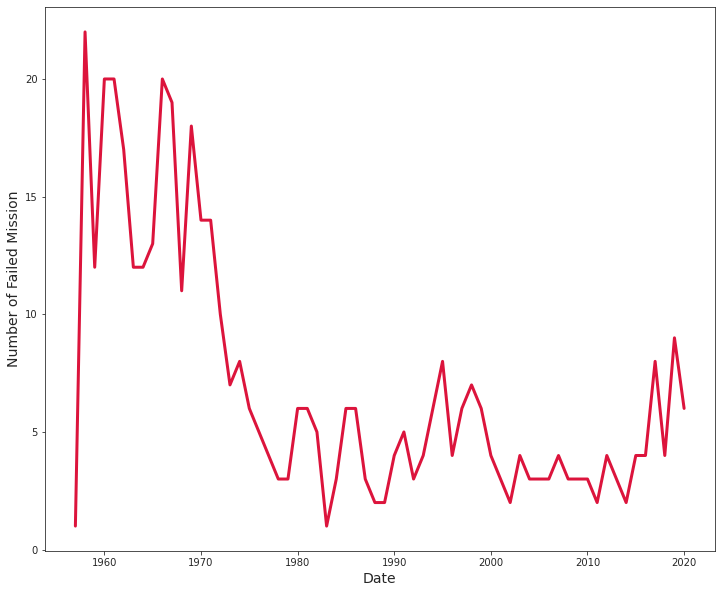

In [499]:
plt.figure(figsize=(12, 10))
plt.plot(failure_year.Date, failure_year.Failed_Mission, color  = 'crimson', linewidth = 3)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Number of Failed Mission', fontsize = 14)
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [508]:
failure_year['failure_pct'] = failure_year.Failed_Mission / launch_per_year.number_of_launches

In [509]:
failure_year

,Date,Failed_Mission,failure_pct
0,1957,1,0.33
1,1958,22,0.79
2,1959,12,0.60
3,1960,20,0.51
4,1961,20,0.38
...,...,...,...
59,2016,4,0.04
60,2017,8,0.09
61,2018,4,0.03
62,2019,9,0.08


,Date,Failed_Mission,failure_pct
0,1957,1,NaN
1,1958,22,NaN
2,1959,12,NaN
3,1960,20,NaN
4,1961,20,NaN


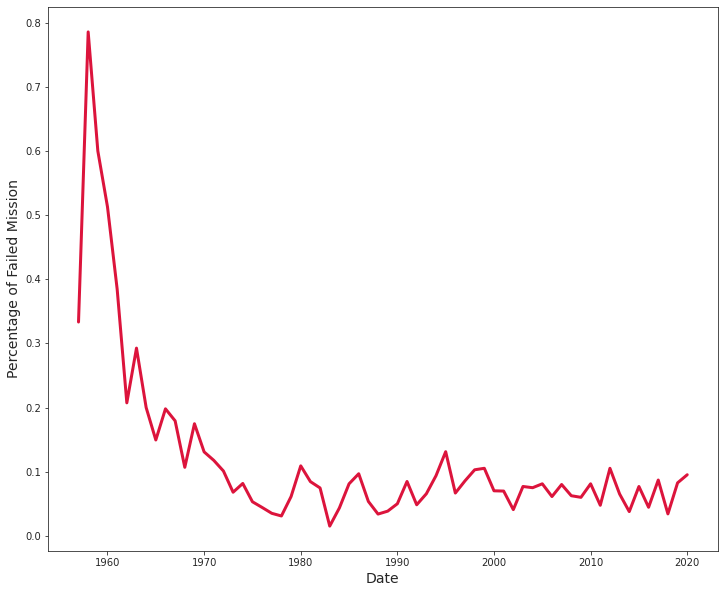

In [510]:
plt.figure(figsize=(12, 10))
plt.plot(failure_year.Date, failure_year.failure_pct, color  = 'crimson', linewidth = 3)
plt.xlabel('Date', fontsize = 14)
plt.ylabel('Percentage of Failed Mission', fontsize = 14)
plt.show()

The percentage of unsuccessful launch has gone done dramatically since the beginning of space program. From 1980 onwards, the percentage of unsuccessful launch is below **0.2%.**

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [513]:
df_country = df_data.groupby([df_data.Date.dt.year, 'Country']).count().rename(columns={'Rocket_Status': 'number_of_launches'})[['number_of_launches']].reset_index()
df_country

,Date,Country,number_of_launches
0,1957,Kazakhstan,2
1,1957,USA,1
2,1958,Kazakhstan,5
3,1958,USA,23
4,1959,Kazakhstan,4
...,...,...,...
407,2020,Japan,3
408,2020,Kazakhstan,6
409,2020,New Zealand,3
410,2020,Russian Federation,3


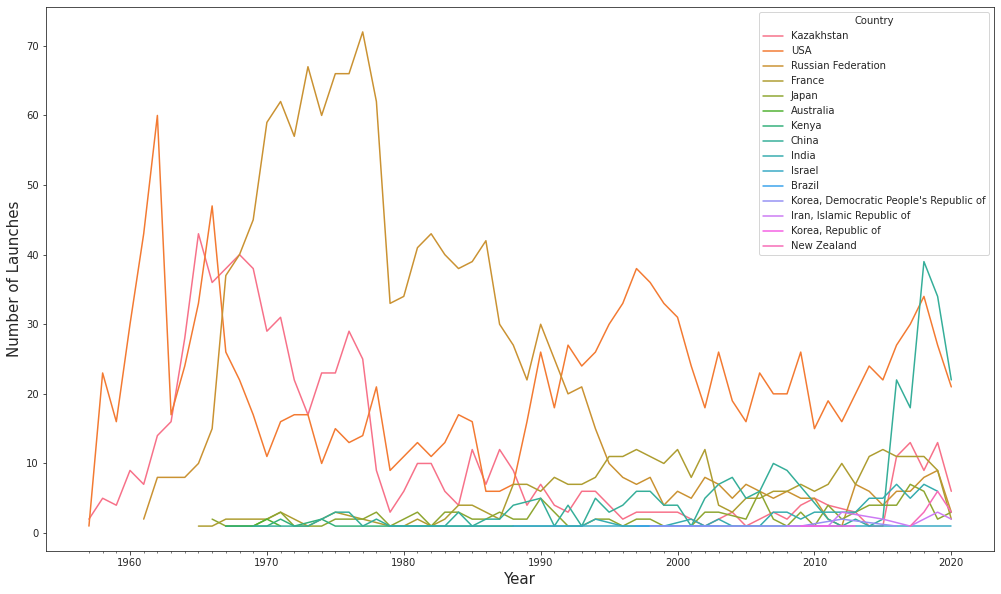

In [523]:
plt.figure(figsize= (17,10))
with sns.axes_style('ticks'):
  sns.lineplot(data = df_country, x='Date', y='number_of_launches', hue = 'Country')

#Set minor ticks
plt.gca().set_xticks(np.arange(df_country.Date.min(), df_country.Date.max()), minor = True)
plt.ylabel('Number of Launches', fontsize = 15)
plt.xlabel('Year', fontsize = 15)
plt.show()
 
plt.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 